### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [6]:
import pandas as pd
data = pd.read_csv('vehicle.csv')
data1 = data.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [13]:
print('Different values in class column are:',data1['class'].unique())

Different values in class column are: ['van' 'car' 'bus']


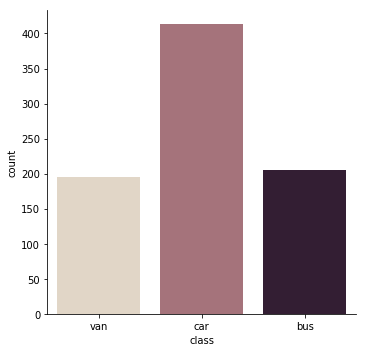

In [16]:
#sns.barplot(x='sex',y='children',hue='smoker', data=med)
import seaborn as sns
sns.catplot(x='class', kind='count', palette="ch:.25", data=data1)

### Check for any missing values in the data 

In [19]:
data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [48]:
df = data1.drop('class',axis=1)
df.head(2)
#for i in data1.columns:
#    if data1[i].dtype == 'object': # Only apply for columns with categorical strings
#        data1[i] = pd.Categorical(data1[i]).codes # Replace strings with an integer

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df)
wdf = pd.DataFrame(df1)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
wdf.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [65]:
cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [66]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5,random_state=5)
  clusters.fit(wdf)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia

In [67]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_error": cluster_error} )
clusters_df[0:15]

,num_clusters,cluster_error
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5191.261507
5,6,4707.860902
6,7,4350.686420
7,8,4089.894296
8,9,3848.185382


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

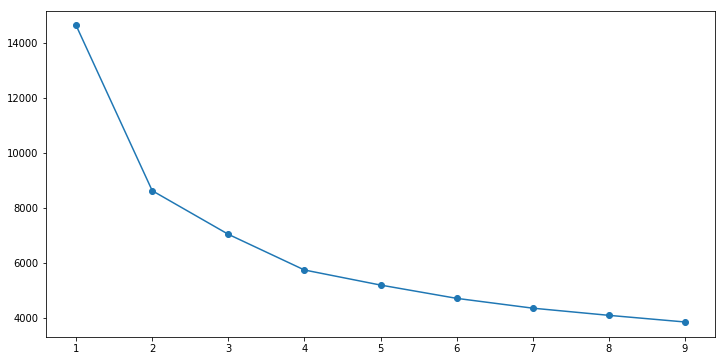

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_error, marker = "o" )


### Find out the optimal value of K

In [69]:
# Looking into the above elbow plot it can be inferred that the optimal k value is observed for k=3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [70]:
# Number of clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.2339617  -0.57387481 -0.30776905 -0.03041322  0.2050726  -0.11653151
  -0.45904181  0.32506329 -0.48798836 -0.53604446 -0.41380935 -0.46366305
  -0.60155031 -0.61924057 -0.06177969  0.01066762  0.81278556  0.69897299]
 [ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067]
 [-0.91987072 -0.52009251 -0.89320752 -1.06435572 -0.50042171 -0.2190738
  -0.7791213   0.86589322 -0.74535635 -0.484632   -0.78240328 -0.78341064
  -0.38498232  0.83878747 -0.09524349 -0.30171562 -1.05420601 -1.11069466]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [72]:
X_df = pd.DataFrame(X)
X_df["centroids"] = labels
X_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,centroids
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,0
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,0
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,0
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,2
5,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521,0
6,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040,0
7,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484,0
8,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040,0
9,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040,0


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [73]:
print('labels are:', kmeans.labels_)


labels are: [0 0 1 0 2 0 0 0 0 0 0 0 0 1 2 0 1 2 2 0 0 1 0 2 1 1 2 0 0 0 1 0 2 1 1 2 1
 2 2 0 1 2 2 2 2 0 2 0 1 0 1 0 0 2 1 2 1 2 2 2 0 2 1 0 1 1 0 2 0 1 0 2 2 1
 0 2 0 1 0 2 0 2 1 0 1 0 2 1 2 2 1 2 2 0 0 2 1 1 2 2 1 0 0 2 2 2 0 1 1 0 2
 2 0 2 2 2 2 2 0 1 1 0 0 2 1 1 2 0 2 0 0 1 2 0 1 0 0 0 0 1 0 0 1 0 1 0 2 0
 2 1 0 0 1 1 0 1 2 2 1 1 0 1 0 0 0 0 2 1 2 0 2 1 0 0 0 1 0 1 0 1 0 2 1 2 2
 2 0 0 1 1 0 0 0 2 1 0 0 0 1 2 2 1 2 0 1 2 2 2 0 1 0 1 2 2 2 2 1 0 2 0 1 2
 0 0 2 1 2 2 0 0 1 2 1 2 0 0 1 0 0 1 1 2 0 0 0 1 2 0 0 2 2 0 0 1 0 2 2 1 0
 0 2 2 1 2 0 1 2 0 1 0 0 1 0 1 2 0 0 1 0 0 0 2 0 1 1 1 1 2 0 1 2 2 2 0 2 1
 1 2 1 0 2 1 0 0 0 1 1 2 1 1 2 1 0 0 0 2 2 1 1 1 0 0 0 1 2 0 2 1 0 0 1 0 1
 1 1 0 2 2 1 2 2 2 0 0 0 0 2 1 1 2 2 1 2 1 2 1 0 2 0 2 1 1 2 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 2 2 0 0 0 2 2 0 2 1 0 0 2 2 1 0 2 0 0 1 0 1 0 1 1 2 2 1 0 2
 2 0 1 1 2 0 1 1 2 1 1 1 0 0 0 0 0 1 2 2 0 1 0 0 1 0 2 1 2 2 1 0 2 1 1 1 2
 1 1 2 0 2 1 1 0 0 2 2 1 0 2 1 1 0 2 1 1 0 2 2 1 1 1 2 2 1 1 1 0 0 1 2 0 1
 0 2 2 0 1 2 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [106]:
import numpy as np
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [112]:
tmp = np.concatenate((a,b,c),axis=0)

In [113]:
tmp1 = pd.DataFrame(tmp,columns=['a', 'b'])
tmp1.head(2)

,a,b
0,13.882785,4.438501
1,11.687256,1.250981


### 10. Use scatter matrix to print all the 3 distributions

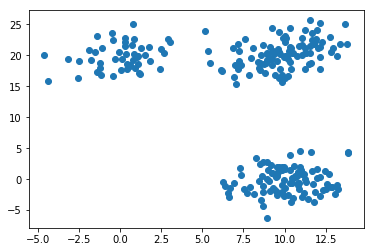

In [114]:
plt.scatter(tmp1['a'],tmp1['b'])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [119]:
kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(tmp1)

# Getting the cluster labels

labels = kmeans.predict(tmp1)

print('labels are:', kmeans.labels_)

labels are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 12. Plot the dendrogram for the consolidated dataframe

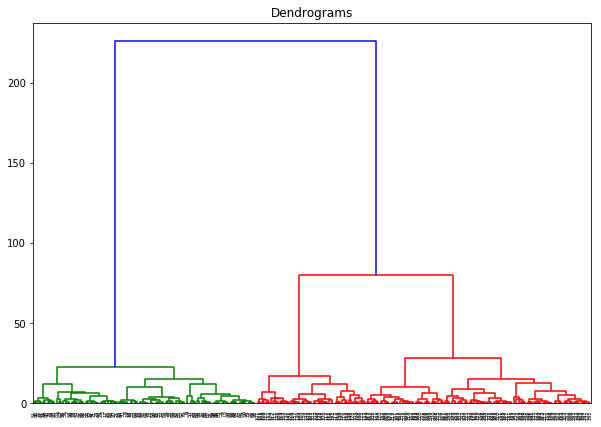

In [120]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(tmp1, method='ward'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

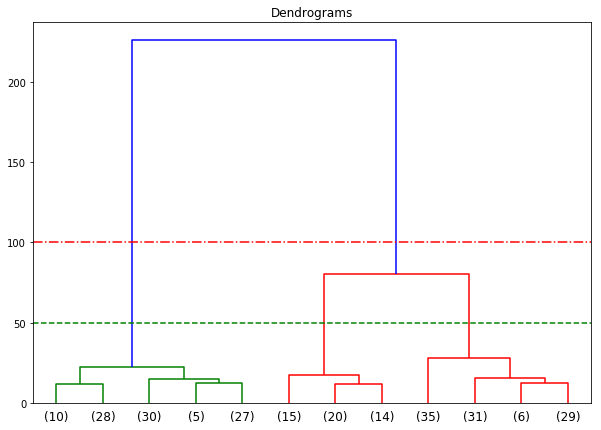

In [125]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(tmp1, method='ward'),truncate_mode='lastp',p=12)
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='r', linestyle='-.')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [0]:
# Looking into the dendrogram above, the horizontal line at 50 appears to be creating most evenly distributed clusters

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 